KMeans Clustering

In [102]:
import random
import math
import json
import sys
import time
import numpy as np
from numpy import linalg as LA
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sb

This is the pseudocode tolad Load data from file and save in the numpy matrix. Alternately you can use panda to read the dataset in to numpy matrix.

data matrix will have data points. The columns of data have features.  ClassLabel has the labels.

In [104]:
def load(file_name):
    df = pd.read_csv(file_name)

    # Ensure that the relevant columns are numeric
    df["GPA"] = pd.to_numeric(df["GPA"], errors='coerce')
    df["SAT_Score"] = pd.to_numeric(df["SAT_Score"], errors='coerce')
    df["Extracurricular_Activities"] = pd.to_numeric(df["Extracurricular_Activities"], errors='coerce')

    # Extract attributes and store in an array
    Student_GPA = np.array(df["GPA"])
    Student_SAT = np.array(df["SAT_Score"])
    Student_ECA = np.array(df["Extracurricular_Activities"])
    #keeping the classs label in a different array since it is not numerical
    classLabel = np.array(df["Admission_Status"])

    # Storing categorical Data (student admissions) as numerical Data in a different array:
    Student_AdmissionStatus1 = classLabel.copy()
    for index, value in enumerate(Student_AdmissionStatus1):
        if value == "Rejected":
            Student_AdmissionStatus1[index] = int(0)
        elif value == "Waitlisted":
            Student_AdmissionStatus1[index] = int(1)
        elif value == "Accepted":
            Student_AdmissionStatus1[index] = int(2)

    # Return the numerical data
    data = np.column_stack((Student_GPA, Student_SAT, Student_ECA))
    return data, classLabel

simple centroid initialization function

In [106]:
def initialize_centroids_simple(data, dimension, k):
    
    #centroids: [[centroid0:  3 dimensions, , , ]; [centroid1: 3 dimensions ] ... ..]
    centroids = np.array([[0 for _ in range(dimension)] for _ in range(k)]) #initializes the centroids with k rows and dimension columns using an inner and outer for loop
    #TO DO
    #Write your code to return initialized centroids by randomly assiging them to K points
    random_indices = np.random.choice(data.shape[0], k, replace=False)  # Select k random data points
    print(random_indices)
    centroids = data[random_indices]  # Use these random points as the initial centroids
    print(centroids)
    return centroids

Calculate eucledian distance

In [108]:
def get_euclidean_distance(p1, p2):
    distance = -1.0
    #Write your code
    distance = np.sqrt(np.sum((p1-p2)**2))
    return distance

KMeans Function


In [110]:
def kmeans(data, dimension, k, max_iterations=100, tolerance=1e-4):
    N = np.size(data, 0)  # Number of data points
    centroids = initialize_centroids_simple(data, dimension, k)
    print(f"Initial Centroids: \n{centroids}")

    # Cluster affiliation array initialized to -1 (no assignment)
    cluster_affiliation = np.array([-1 for _ in range(N)])

    # To track if centroids have changed significantly
    flag = True
    iteration = 0

    while flag and iteration < max_iterations:
        flag = False
        iteration += 1

        # Step 1: Assign each point to the nearest centroid
        for i, point in enumerate(data):
            min_distance = float('inf')
            min_distance_index = None

            # Find the closest centroid
            for cluster_index, centroid in enumerate(centroids):
                distance = get_euclidean_distance(centroid, point)
                if distance < min_distance:
                    min_distance = distance
                    min_distance_index = cluster_index

            # Update cluster affiliation if it's changed
            if cluster_affiliation[i] != min_distance_index:
                cluster_affiliation[i] = min_distance_index
                flag = True  # Set flag to true if any point changes its cluster

        # Step 2: Recompute centroids
        new_centroids = np.zeros((k, dimension))  # New centroids initialized to zeros
        cluster_point_count = np.zeros(k)  # Keep count of the number of points in each cluster
        
        for i, cluster_index in enumerate(cluster_affiliation):
            # Add the point to its assigned cluster centroid
            new_centroids[cluster_index] += data[i]
            cluster_point_count[cluster_index] += 1

        # Avoid division by zero: only update centroids for non-empty clusters
        for cluster_index in range(k):
            if cluster_point_count[cluster_index] > 0:
                new_centroids[cluster_index] /= cluster_point_count[cluster_index]

        # Step 3: Check for convergence (centroid movement below tolerance)
        centroid_shift = np.linalg.norm(new_centroids - centroids)
        if centroid_shift < tolerance:
            print(f"Convergence reached after {iteration} iterations.")
            break

        # Update centroids for the next iteration
        centroids = new_centroids
        print(f"Iteration {iteration}: Centroid Shift = {centroid_shift}")

        WCSS = 0
        for i, point in enumerate(data):
            centroid = centroids[cluster_affiliation[i]]
            WCSS += np.sum((point - centroid) ** 2)

        # Divide by N to get the average WCSS
        avg_WCSS = WCSS / N
        print(f"Final WCSS: {WCSS}")
        print(f"Average WCSS: {avg_WCSS}")

    return centroids, cluster_affiliation


In [111]:
def visualize_clusters(data, centroids, cluster_affiliation, classLabel):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Define colors for clusters (Ensure there are k colors, where k is the number of clusters)
    colors = ['blue', 'red', 'yellow']

    # Make sure the classLabel is the same length as data
    if len(classLabel) != len(data):
        raise ValueError("The length of classLabel must match the number of data points")

    # Define markers for class labels
    marker_shapes = []
    for value in classLabel:
        if value == "Rejected":
            marker_shapes.append('o')  # Circle for class rejected
        elif value == "Waitlisted":
            marker_shapes.append('s')  # Square for class waitlisted
        elif value == "Accepted":
            marker_shapes.append('^')  # Triangle for class Accepted
        else:
            marker_shapes.append('o')  # Default shape if the label is not recognized

    # Plot each point with its cluster color and class shape
    for i, point in enumerate(data):
        # Ensure that the cluster_affiliation index is within the range of colors
        if cluster_affiliation[i] >= len(colors):
            raise ValueError(f"Cluster affiliation {cluster_affiliation[i]} exceeds the number of available colors")

        ax.scatter(point[0], point[1], point[2], marker=marker_shapes[i], color=colors[cluster_affiliation[i]])

    # Plot centroids
    for centroid in centroids:
        ax.scatter(centroid[0], centroid[1], centroid[2], color='black', marker='x', s=100)

    ax.set_title("K-Means Clusters")
    plt.show()

[242 154  31]
[[   3.28  951.      4.  ]
 [   2.68 1586.      0.  ]
 [   3.59 1037.      2.  ]]
Initial Centroids: 
[[   3.28  951.      4.  ]
 [   2.68 1586.      0.  ]
 [   3.59 1037.      2.  ]]
Iteration 1: Centroid Shift = 165.80478027451642
Final WCSS: 1809810.605484266
Average WCSS: 7239.242421937064
Iteration 2: Centroid Shift = 39.96463306952234
Final WCSS: 1473263.8530045322
Average WCSS: 5893.055412018129
Iteration 3: Centroid Shift = 24.251012764827216
Final WCSS: 1368052.4816265737
Average WCSS: 5472.209926506295
Iteration 4: Centroid Shift = 20.35526998483656
Final WCSS: 1295365.5834865756
Average WCSS: 5181.462333946302
Iteration 5: Centroid Shift = 13.563833810376185
Final WCSS: 1266482.730745193
Average WCSS: 5065.930922980772
Iteration 6: Centroid Shift = 12.021506959557671
Final WCSS: 1237633.0316420256
Average WCSS: 4950.532126568102
Iteration 7: Centroid Shift = 13.614351444901917
Final WCSS: 1204765.8488791694
Average WCSS: 4819.063395516678
Iteration 8: Centroid 

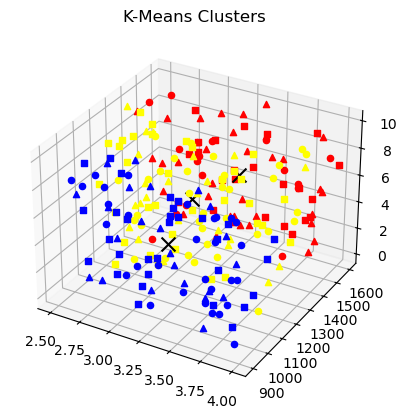

In [112]:
def main():
    start = time.time()

    # input path of the real data
    # data file contains features, and class label in each line separated by comma
    inputpath = 'student_admission_dataset.csv'
    K = 3  # K clusters

    inputfilename = inputpath
    data, classlabel = load(inputfilename)  # read data file. You can use panda if you want. data will be numpy 2d array
    data = data[:, 0:3]  # first three dimensions

    centroids, cluster_affiliation = kmeans(data, 3, K)
    # TODO
    # With the cluster affiliation and the final centroids, draw a 3D plot where:
    # 1. Plot the data points using the shapes. Using the given ClassLabel data(ground truth) ,
    # determine the shape of the each data point (triangle, square or circle).
    
    # 2. Determine the shape fill color by the cluster_affiliation  for each data point.
    # Such as for cluster 0: use blue fill.,  for cluster 1: red, cluster 2: yellow, etc.
    print('Duration: %s' % (time.time() - start))
    visualize_clusters(data, centroids, cluster_affiliation, classlabel)


if __name__ == "__main__":
    main()